# 類似度分析自習

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline 

In [2]:
#データ読み込み
DATA_IN_PATH = './data_in/'
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')
print(train_data.head())
print("学習データ数 :{}".format(len(train_data)))

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
#question1 + question2
train_set = pd.Series(train_data['question1'].tolist()+train_data['question2'].tolist()).astype(str)
train_set.head()

#save
train_set.to_csv('./data_in/asdb.csv')

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [7]:
print('学習データ数 : {}'.format(len(np.unique(train_set))))
print('繰り返して表す質問の数 : {}'.format(np.sum(train_set.value_counts()>1)))

교육 데이터의 총 질문수:537361
반복해서 나타나는 질문 수 :111873


In [1]:
#グラフ
plt.figure(figsize=(12,5))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5 , color= 'b', label='word')
plt.yscale('log')

NameError: name 'plt' is not defined

In [9]:
#　質問に関する分析
print('繰り返して表す質問 max:{}'.format(np.max(train_set.value_counts())))
print('繰り返して表す質問 min:{}'.format(np.min(train_set.value_counts())))
print('繰り返して表す質問 mean:{:.2f}'.format(np.mean(train_set.value_counts())))
print('繰り返して表す質問 std :{:.2f}'.format(np.std(train_set.value_counts())))
print('繰り返して表す質問 median:{}'.format(np.median(train_set.value_counts())))
print('繰り返して表す質問 25%:{}'.format(np.percentile(train_set.value_counts(),25)))
print('繰り返して表す質問 75%:{}'.format(np.percentile(train_set.value_counts(),75)))

중복 최대 개수:161
중복 최소 개수:1
중복 평균 개수:1.50
중복 표준편차 :1.91
중복 중간길이:1.0
중복 1사분위:1.0
중복 3사분위:1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x27a8ce3ae20>,
 'caps': [<matplotlib.lines.Line2D at 0x27a8ce474c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27a8ce3ab50>],
 'medians': [<matplotlib.lines.Line2D at 0x27a8ce479a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27a8ce47f40>],
 'means': [<matplotlib.lines.Line2D at 0x27a8ce47c70>]}

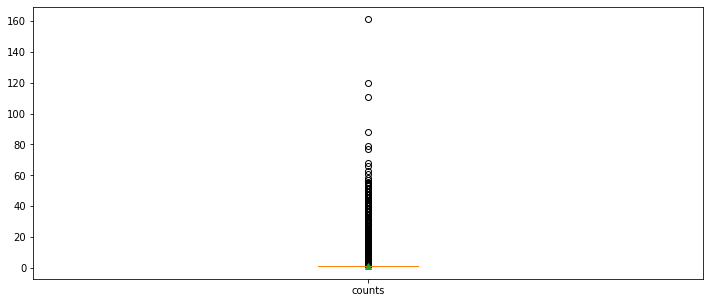

In [10]:
#boxplotで確認
plt.figure(figsize=(12,5))
plt.boxplot([train_set.value_counts()],labels=['counts'],showmeans=True)

(-0.5, 799.5, 799.5, -0.5)

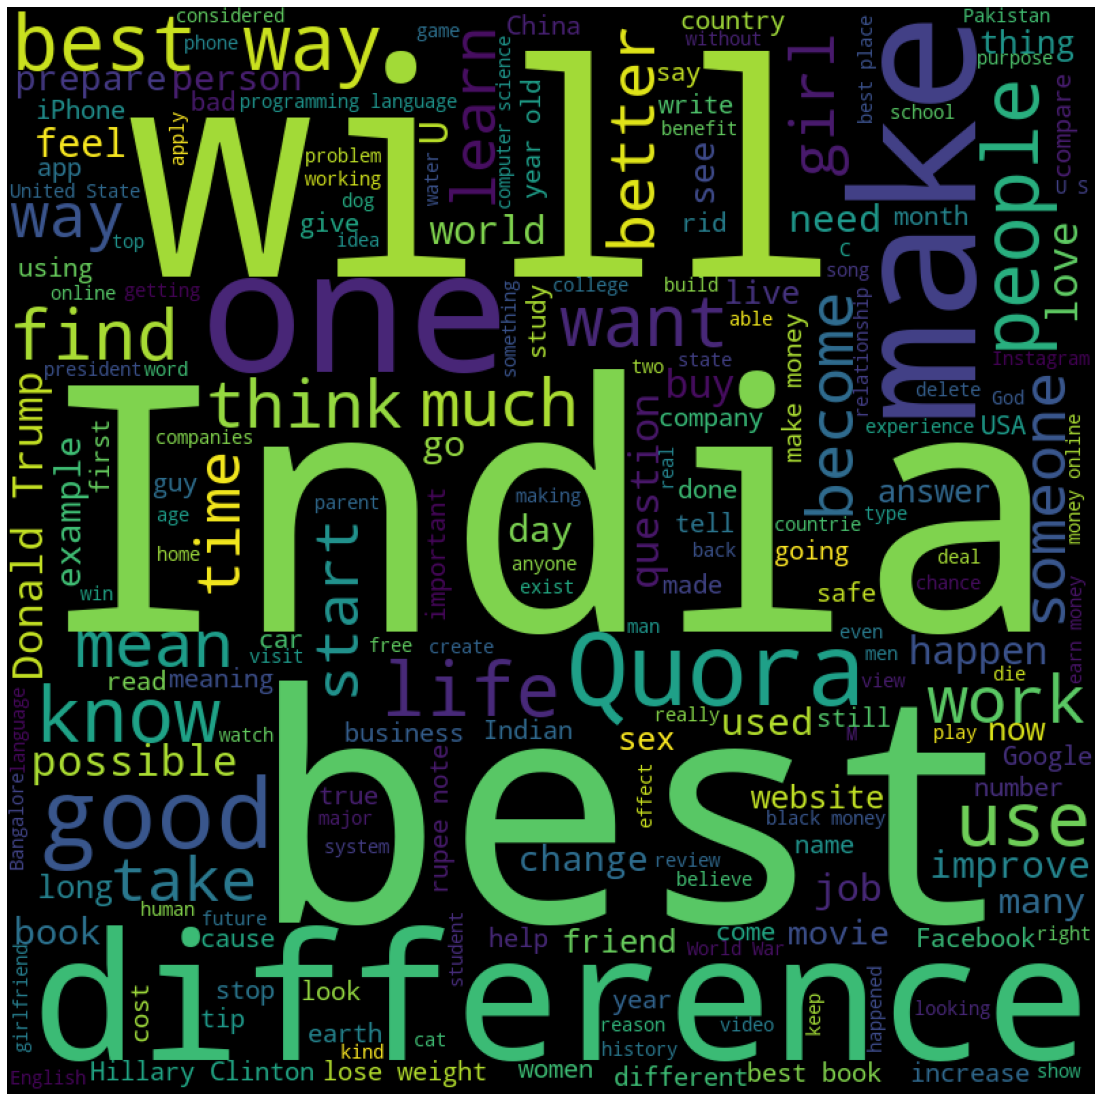

In [11]:
#ワードクラウド
from wordcloud import WordCloud
cloud = WordCloud(width=800, height= 800).generate("".join(train_set.astype(str)))
plt.figure(figsize=(20,20))
plt.imshow(cloud)
plt.axis('off')

C:\Users\kimpa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

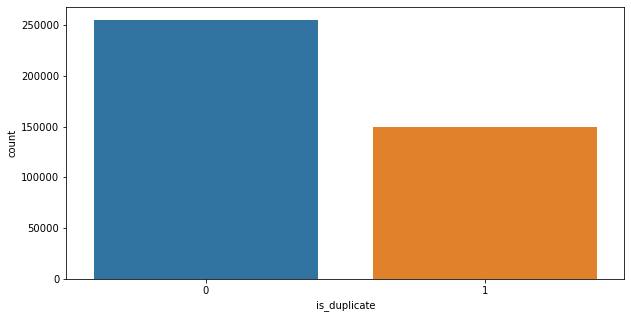

In [12]:
#ラベルの分布
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(10,5)
sns.countplot(train_data['is_duplicate'])

Text(0, 0.5, 'Probabilty')

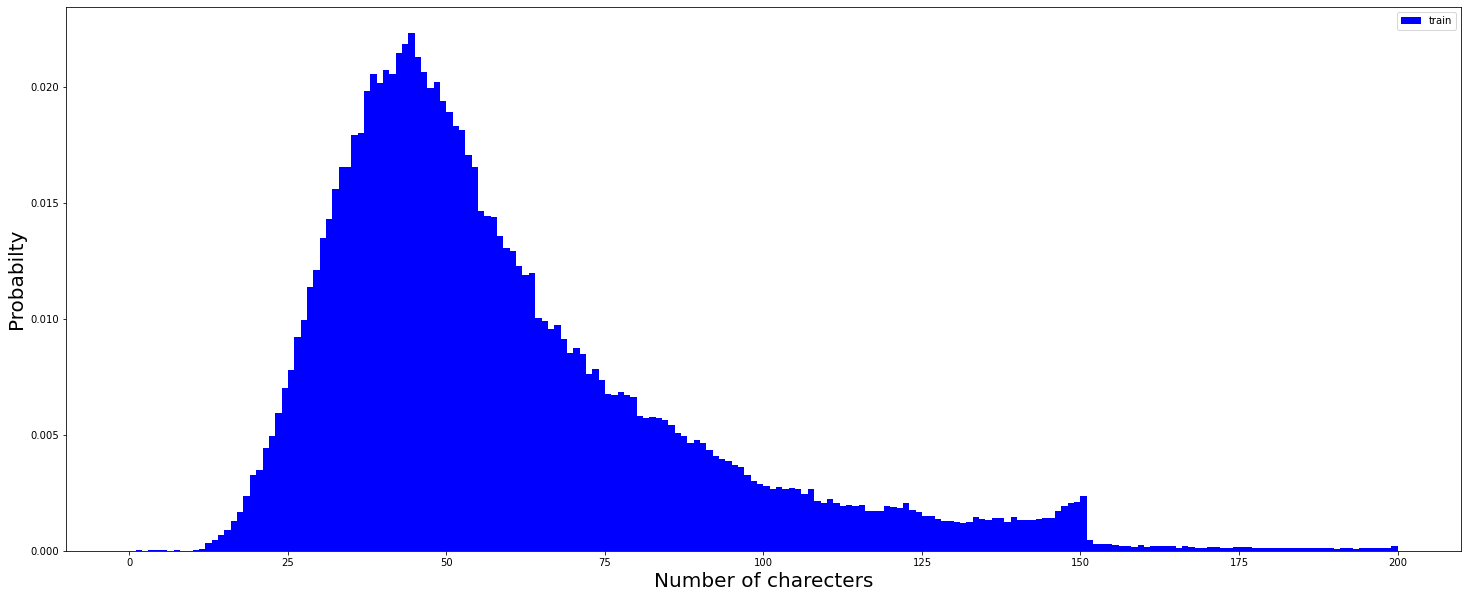

In [13]:
#データの長さに関する分析
train_length = train_set.apply(len)
plt.figure(figsize=(25,10))
plt.hist(train_length, bins=200 , range=[0,200], facecolor='b', density=True, label="train")
plt.legend()
plt.xlabel('Number of charecters', fontsize=20)
plt.ylabel('Probabilty', fontsize=20)

In [14]:
print('長さ max :{}'.format(np.max(train_length)))
print('長さ min :{}'.format(np.min(train_length)))
print('長さ mean:{:.1f}'.format(np.mean(train_length)))
print('長さ std :{:.1f}'.format(np.std(train_length)))
print('長さ median :{}'.format(np.median(train_length)))
print('長さ 25% :{}'.format(np.percentile(train_length, 25)))
print('長さ 75% :{}'.format(np.percentile(train_length, 75)))

질문 길이 최댓값 :1169
질문 길이 평균값 :59.8
질문 길이 표준편차 :32.0
질문 길이 중앙값 :51.0
질문 길이 1사분위 :39.0
질문 길이 3사분위 :72.0


{'whiskers': [<matplotlib.lines.Line2D at 0x27a906e9160>,
 'caps': [<matplotlib.lines.Line2D at 0x27a906e9700>,
 'boxes': [<matplotlib.lines.Line2D at 0x27a90808e50>],
 'medians': [<matplotlib.lines.Line2D at 0x27a906e9ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27a906da280>],
 'means': [<matplotlib.lines.Line2D at 0x27a906e9f70>]}

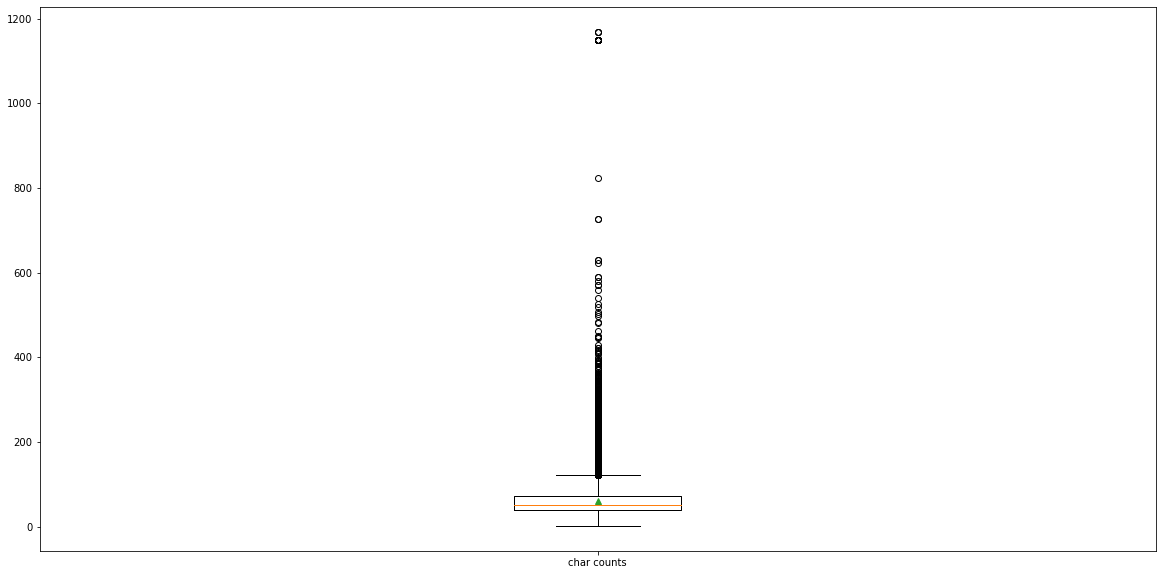

In [15]:
#boxplotで確認
plt.figure(figsize=(20,10))
plt.boxplot(train_length, labels=['char counts'],showmeans=True)

Text(0, 0.5, 'Probabilty')

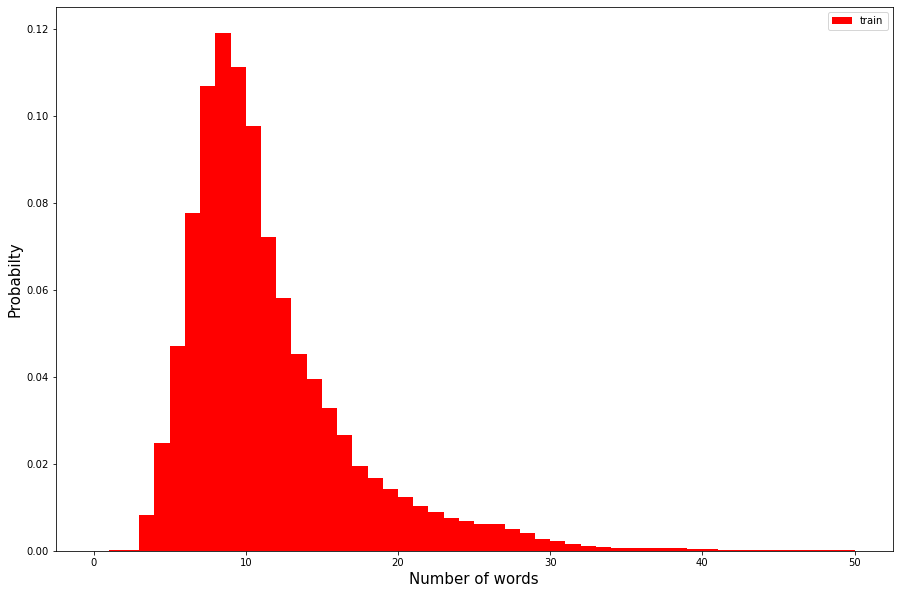

In [16]:
#単語数に関する分析
train_word_counts = train_set.apply(lambda x : len(x.split(" ")))
plt.figure(figsize=(15,10))
plt.hist(train_word_counts, bins=50, range=[0,50], facecolor='r', density=True, label= 'train')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probabilty', fontsize=15)

In [17]:
print("単語数 max : {}".format(np.max(train_word_counts)))
print("単語数 min : {}".format(np.min(train_word_counts)))
print("単語数 mean :{:.2f}".format(np.mean(train_word_counts)))
print("単語数 std :{:.2f}".format(np.std(train_word_counts)))
print("単語数 median :{}".format(np.median(train_word_counts)))
print("単語数 25% :{}".format(np.percentile(train_word_counts,25)))
print("単語数 75% :{}".format(np.percentile(train_word_counts,75)))

질문 단어 개수 최댓값:237
질문 단어 개수 평균값:11.06
질문 단어 개수 표준편차:5.89
질문 단어 개수 중앙값:10.0
질문 단어 개수 제1사분위:7.0
질문 단어 개수 제3사분위:13.0
질문 단어 개수 99퍼센트:31.0


{'whiskers': [<matplotlib.lines.Line2D at 0x27a907654c0>,
 'caps': [<matplotlib.lines.Line2D at 0x27a90765a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x27a907651f0>],
 'medians': [<matplotlib.lines.Line2D at 0x27a90755040>],
 'fliers': [<matplotlib.lines.Line2D at 0x27a907555e0>],
 'means': [<matplotlib.lines.Line2D at 0x27a90755310>]}

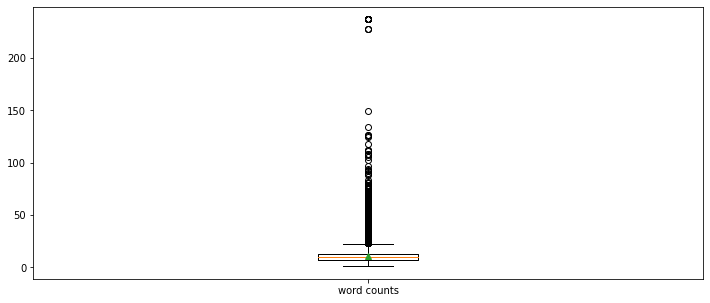

In [18]:
#boxplotで確認
plt.figure(figsize=(12,5))
plt.boxplot(train_word_counts,labels=['word counts'],showmeans=True)

# データ前処理

In [20]:
import re
import json
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [21]:
#データ読み込み
DATA_IN_PATH = './data_in/'
train_data =pd.read_csv( DATA_IN_PATH + 'train.csv', encoding='utf-8')

In [22]:
# resampling
# 1 - ((多いラベル - 少ないラベル) / 多いラベル) → .sample( ) resampling

train_pos_data = train_data.loc[train_data['is_duplicate']==1]
train_neg_data = train_data.loc[train_data['is_duplicate']==0]

clss_difference= len(train_neg_data) - len(train_pos_data)
sample_frac = 1- (clss_difference/ len(train_neg_data))
train_neg_data = train_neg_data.sample(frac= sample_frac)

print("label 1 = {}".format(len(train_pos_data)))
print("label 0 = {}".format(len(train_neg_data)))

#データ集計
train_data= pd.concat([train_neg_data, train_pos_data])

In [25]:
#テキストcleansing
FILTERS = "([~.,!?\"':;)(])"

change_filter= re.compile(FILTERS)

questions1 = [str(s) for s in train_data['question1']]
questions2 = [str(s) for s in train_data['question2']]

filtered_questions1 = list()
filtered_questions2 = list()

for q in questions1 :
    filtered_questions1.append(re.sub(change_filter,"",q).lower())

for q in questions2 :
    filtered_questions2.append(re.sub(change_filter,"",q).lower())


In [26]:
#tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts(filtered_questions1 + filtered_questions2)
questions1_sequence = tokenizer.texts_to_sequences(filtered_questions1)
questions2_sequence = tokenizer.texts_to_sequences(filtered_questions2)

MAX_SEQUENCE_LENGTH = 31  
q1_data= pad_sequences(questions1_sequence , maxlen=MAX_SEQUENCE_LENGTH, padding='post')
q2_data= pad_sequences(questions2_sequence,  maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [29]:
#単語辞書（corpas）
word_vocab= {}
word_vocab = tokenizer.word_index
word_vocab["<PAD>"]=0

labels= np.array(train_data['is_duplicate'], dtype=int)

print('q1 데이터 형태 : {}'.format(q1_data.shape))
print('q2 데이터 형태 : {}'.format(q2_data.shape))
print('label 데이터 형태 : {}'.format(labels.shape))
print('word 인덱스 : {}'.format(len(word_vocab)))

#dictionaryに追加
data_configs= {}
data_configs['vocab']= word_vocab
data_configs['vocab_size']=len(word_vocab)

q1 데이터 형태 : (298526, 31)
q2 데이터 형태 : (298526, 31)
label 데이터 형태 : (298526,)
word 인덱스 : 76543


In [40]:
#train データセット
TRAIN_Q1_DATA='q1_train.npy'
TRAIN_Q2_DATA='q2_train.npy'
TRAIN_LABEL_DATA='label_train.npy'
DATA_CONFIGS='data_configs.npy'

np.save(open(DATA_IN_PATH + TRAIN_Q1_DATA , 'wb') , q1_data)
np.save(open(DATA_IN_PATH + TRAIN_Q2_DATA , 'wb') , q2_data)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA , 'wb') , labels)
np.save(open(DATA_IN_PATH + DATA_CONFIGS , 'wb') , data_configs)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))

In [33]:
#テスト・データ・セット

test_data=pd.read_csv(DATA_IN_PATH + 'test.csv', encoding='utf-8')
valid_ids=[type(x) == int for x in test_data.test_id]
test_data=test_data[valid_ids].drop_duplicates() #중복을 제거하는 함수.

test_questions1 = [str(s) for s in test_data['question1']]
test_questions2 = [str(s) for s in test_data['question2']]

filtered_test_questions1 = list()
filtered_test_questions2 = list()

for q in test_questions1 :
    filtered_test_questions1.append(re.sub(change_filter,"",q).lower())

for q in test_questions2 :
    filtered_test_questions2.append(re.sub(change_filter,"",q).lower())

test_questions1_sequence = tokenizer.texts_to_sequences(filtered_test_questions1)
test_questions2_sequence = tokenizer.texts_to_sequences(filtered_test_questions2)

test_q1_data= pad_sequences(test_questions1_sequence , maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_q2_data= pad_sequences(test_questions2_sequence,  maxlen=MAX_SEQUENCE_LENGTH, padding='post')

test_id = np.array(test_data['test_id']) #학습후 예측시 필요한 라벨 컬럼

TEST_Q1_DATA='test_q1.npy'
TEST_Q2_DATA='test_q2.npy'
TEST_ID_DATA='test_id.npy'

np.save(open(DATA_IN_PATH + TEST_Q1_DATA , 'wb'), test_q1_data)
np.save(open(DATA_IN_PATH + TEST_Q2_DATA , 'wb'), test_q2_data)
np.save(open(DATA_IN_PATH + TEST_ID_DATA , 'wb'), test_id)

# CNNモデル

In [66]:
import os
import json
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [64]:
#データ読み込み
TRAIN_Q1_DATA_FILE = 'q1_train.npy'
TRAIN_Q2_DATA_FILE = 'q2_train.npy'
TRAIN_LABEL_DATA_FILE = 'label_train.npy'
DATA_CONFIGS = 'data_configs.json'

train_q1_data = np.load(open(DATA_IN_PATH + TRAIN_Q1_DATA_FILE , 'rb'))
train_q2_data = np.load(open(DATA_IN_PATH + TRAIN_Q2_DATA_FILE , 'rb'))
train_labels = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA_FILE , 'rb'))
prepro_configs= json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))

In [67]:
#embedding layer定義
class SentenceEmbedding(layers.Layer):
    def __init__(self,**kargs):
        super(SentenceEmbedding, self).__init__()
        
        self.conv = layers.Conv1D(kargs['conv_num_filters'],kargs['conv_window_size'],activation=tf.keras.activations.relu,
                                 padding='same')
        self.max_pool = layers.MaxPool1D(kargs['max_pool_seq_len'],1)
        self.dense = layers.Dense(kargs['sent_embedding_dimension'],
                                 activation=tf.keras.activations.relu)
        
    def call(self,x):
        x = self.conv(x)
        x = self.max_pool(x)
        x = self.dense(x)
        
        return tf.squeeze(x,1)

In [68]:
#類似度モデル定義
class SentenceSimilarityModel(tf.keras.Model):
    def __init__(self, **kargs):
        super(SentenceSimilarityModel,self).__init__(name=kargs['model_name'])
        
        self.word_embedding = layers.Embedding(kargs['vocab_size'],kargs['word_embedding_dimension'])
        
        self.base_encoder = SentenceEmbedding(**kargs)
        self.hypo_encoder = SentenceEmbedding(**kargs)
        self.dense = layers.Dense(kargs['hidden_dimension'], activation=tf.keras.activations.relu)
        self.logit = layers.Dense(1, activation=tf.keras.activations.sigmoid)
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        
    def call(self,x):
        x1,x2 = x
        b_x = self.word_embedding(x1)
        h_x = self.word_embedding(x2)
        b_x = self.dropout(b_x)
        h_x = self.dropout(h_x)
        
        b_x = self.base_encoder(b_x)
        h_x = self.hypo_encoder(h_x)
        
        e_x = tf.concat([b_x, h_x], -1)
        e_x = self.dense(e_x)
        e_x = self.dropout(e_x)
        
        return self.logit(e_x)

In [83]:
#パラメータ設定
model_name = 'cnn_similarity'
BATCH_SIZE = 1024
NUM_EPOCHS = 100
VALID_SPLIT = 0.1
MAX_LEN = 31

kargs = {'model_name' : model_name , 'vocab_size' : data_configs['vocab_size'],
        'word_embedding_dimension': 100,
        'conv_num_filters': 300,
        'conv_window_size': 3,
        'max_pool_seq_len': MAX_LEN,
        'sent_embedding_dimension': 128,
        'dropout_rate': 0.2,
        'hidden_dimension': 200,
        'output_dimension':1}

In [85]:
#モデルcompile
model = SentenceSimilarityModel(**kargs)

model.compile(optimizer = tf.keras.optimizers.Adam(1e-3),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

In [87]:
#overfitting 防止設定
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=1)

checkpoint_path = DATA_OUT_PATH + model_name +'/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
    print("{} -- folder already exist ".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok = True)
    print("{} -- folder create".format(checkpoint_dir))
    
    
cp_callback = ModelCheckpoint(checkpoint_path, monitor ='val_accuracy', verbose = 1 , save_best_only=True,
                             save_weights_only=True)

./data_out/cnn_similarity -- folder create


In [88]:
#学習
history = model.fit((q1_data,q2_data),labels, batch_size=BATCH_SIZE , epochs = NUM_EPOCHS, validation_split = VALID_SPLIT,
                   callbacks=[earlystop_callback,cp_callback])

Epoch 1/100
263/263 [==============================] - ETA: 0s - loss: 0.5494 - accuracy: 0.7183
Epoch 1: val_accuracy improved from -inf to 0.70204, saving model to ./data_out/cnn_similarity\weights.h5
263/263 [==============================] - 100s 370ms/step - loss: 0.5494 - accuracy: 0.7183 - val_loss: 0.5337 - val_accuracy: 0.7020
Epoch 2/100
263/263 [==============================] - ETA: 0s - loss: 0.4426 - accuracy: 0.7927
Epoch 2: val_accuracy improved from 0.70204 to 0.72867, saving model to ./data_out/cnn_similarity\weights.h5
263/263 [==============================] - 93s 355ms/step - loss: 0.4426 - accuracy: 0.7927 - val_loss: 0.5327 - val_accuracy: 0.7287
Epoch 3/100
263/263 [==============================] - ETA: 0s - loss: 0.3523 - accuracy: 0.8420
Epoch 3: val_accuracy improved from 0.72867 to 0.77707, saving model to ./data_out/cnn_similarity\weights.h5
263/263 [==============================] - 95s 360ms/step - loss: 0.3523 - accuracy: 0.8420 - val_loss: 0.5140 - val

In [90]:
#予測・csvへsave
TEST_Q1_DATA_FILE = 'test_q1.npy'
TEST_Q2_DATA_FILE = 'test_q2.npy'
TEST_ID_DATA_FILE = 'test_id.npy'

test_q1_data = np.load(open(DATA_IN_PATH + TEST_Q1_DATA_FILE, 'rb'))
test_q2_data = np.load(open(DATA_IN_PATH + TEST_Q2_DATA_FILE, 'rb'))
test_id_data = np.load(open(DATA_IN_PATH + TEST_ID_DATA_FILE, 'rb'),allow_pickle=True)

SAVE_FILE_NM ='weights.h5'

model.load_weights(os.path.join(DATA_OUT_PATH, model_name , SAVE_FILE_NM))

predictions = model.predict((test_q1_data, test_q2_data), batch_size = BATCH_SIZE)
predictions = predictions.squeeze(-1)

output = pd.DataFrame( data={'test_id': test_id_data , "is_duplicate":list(predictions)})
output.to_csv("cnn_predict.csv", index=False, quoting=3)

2291/2291 [==============================] - 180s 78ms/step
